# Lectura 4 Modelo Logístico en Tiempo Discreto
### Taller de herramientas y problemas en ingeniería industrial
### g.a.b.

# Nonlinear Models
one simply defined recurrence relations can have very
complex (chaotic) behaviors, and they are a part of the field of
mathematics known as nonlinear analysis.

## Logistic difference equation (Discrete Logistic Model)
As a population increases, fixed resources must be shared between more and more individuals. A reasonable assumption is that as the population
increases, the growth rate declines because of some combination of
increased death and decreases of birth. Further there is probably
some population level which cannot be exceeded called ${carrying\ 
capacity}$. If a population were near the carrying capacity, its
growth rate would be zero. If the population were small, the growth
rate would be at its largest.


$r(x)$ is defined as the growth rate depending on the value of $x$, the state variable (size of population). The growth rate function $r(x)$ should pass through $(0,R$) and $(K,0)$, where $R$ is the intrinsic growth rate and $K$ is the carrying capacity. The growth rate function for the logistic model is found using the point-slope
equation for a line trough  $(0,R$) and $(K,0)$, which is

$r(x)-R=-\frac{R}{K}(x-0)$

solving for $r(x)$ yields

$r(x)=R-\frac{Rx}{K}=R(1-\frac{x}{K})$

given the growth equation

$\Delta_{x_{(n-1)}}=x_{(n)}-x_{(n-1)}=rx_{(n-1)}$

and conisdering that $r$ is not constant but changing according to the avlue of $x$,substituting our expression for $r(x)$ gives us

$\Delta_{x_{(n-1)}}=x_{(n)}-x_{(n-1)}=R\left(1-\frac{x_{(n-1)}}{K}\right)x_{(n-1)}=Rx_{(n-1)}-\frac{Rx_{(n-1)}^2}{K}$

then the dinamic system in discrete time can be defined as:

$$x_{(n)}=x_{(n-1)}+\Delta_{x_{(n-1)}}$$

$$x_{(n)}=x_{(n-1)}+R\left(1-\frac{x_{(n-1)}}{K}\right)x_{(n-1)}$$

given the state at $n=0$, $x_{(0)}$

### Example: Growth of a yeast culture
The next data was collected from an experiment measuring the growth of yeast culture

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plp

In [2]:
#For uploading the file using Colaboratory
#from google.colab import files
#uploaded = files.upload()

In [3]:
datos=pd.read_csv("datos1.txt", sep=' ')

In [4]:
datos.shape

(21, 2)

In [5]:
datos

,tiempo,pob
0,0,20.000000
1,1,27.680670
2,2,37.998363
3,3,51.967770
4,4,70.774277
5,5,95.736130
6,6,128.403611
7,7,170.262015
8,8,222.458555
9,9,285.366102


### Modelo logístico en tiempo discreto
We assume that the logistic model in discrete time is adequate for modeling the observed data. That means the mathematical model is:

$$x_{(n)}=x_{(n-1)}\left(R\left(1-\frac{x_{(n-1)}}{K}\right)+1\right)$$
$$x_{(0)}$$

The values of parameters <b>$K$</b> and <b>$R$</b> have to be determined

First, we have to corroborate that the logistic model is appropriate by plotting $n$ versus $P_{(n)}$ and $P_{(n)}$ versus $\Delta{P_{(n)}}$. In this case $P_{(n)}$ is the state variable, the growth of yeast culture

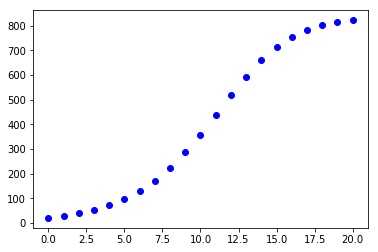

In [6]:
plp.plot(datos["tiempo"],datos["pob"],"bo")

Given <b>R</b> is the intrinsic growth rate

$\Delta x_{(n)}=x_{(n)}R-x_{(n)}^2\frac{R}{K}$

The maximum value is obtained when $x_{(n)}=K/2$

$\Delta x^{'}_{(n)}=R-2x_{(n)}\frac{R}{K}$

$\Delta  x^{'}_{(n)}=0$

$x_{(n)}=K/2$

$\Delta x^{''}_{(n)}=-2\frac{R}{K}$

In [7]:
p_n=datos["pob"].values
print(p_n)
print(len(p_n))

[ 20.          27.68066988  37.99836305  51.96776983  70.77427663
  95.73613043 128.40361111 170.26201509 222.45855455 285.36610172
 357.71618223 436.43322606 516.70667055 592.59536723 658.87698711
 712.43244535 752.737573   781.30193458 800.68083407 813.37284237
 821.50236112]
21


In [8]:
delta_pn=np.zeros(len(p_n)-1)
for i in range(len(p_n)-1):
    delta_pn[i]=p_n[i+1]-p_n[i] 
print(delta_pn)    

[ 7.68066988 10.31769317 13.96940678 18.8065068  24.96185379 32.66748069
 41.85840398 52.19653946 62.90754716 72.35008051 78.71704382 80.2734445
 75.88869668 66.28161988 53.55545824 40.30512765 28.56436158 19.37889949
 12.6920083   8.12951875]


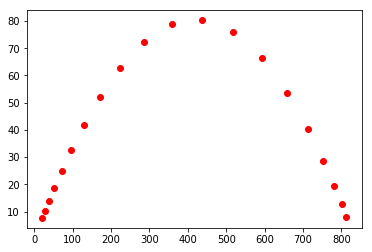

In [9]:
plp.plot(p_n[:-1],delta_pn,"ro")

In [10]:
plp.show()

In order to compute the values of $R$ and $K$, first, a values range is defined for $K$ based on the maximum value observed of the state variable $P_{(n)}$ and the fact that the maximux value for the growth rate is obtained when the state variable values  $P_{(n)}$ is equal to $K/2$

In [11]:
k_max=2*p_n[np.argmax(delta_pn)+1]
print(k_max)

1033.4133411096468


In [12]:
k_min=np.max([p_n[-1],2*p_n[[np.argmax(delta_pn)-1]]])
print(k_min)

821.5023611206648


In [13]:
p_n[[np.argmax(delta_pn)-1]]*2

array([715.43236446])

In [14]:
print(k_min,' ',k_max)

821.5023611206648   1033.4133411096468


Now for estimating the values of $K$ and $R$ we use a linear model relationating the change rate with the intrinsic growth rate $R$

$$\Delta_{x_{(n)}}=r(x)=my$$

where $y$ is

$x_{(n)}(1-\frac{x_{(n)}}{K})$

The growth rate function for the logistic model is

$\Delta r(x_{(n)})=x_{(n)}\frac{R}{K}(K-x_{(n)})$

redefine $y$ as

$y=x_{(n)}(1-\frac{x_{(n)}}{K})$
then:

$r(x_{(n)})=Ry$

## Procedure for approximating the values of $K$ y $R$

given the values range defined for $K$

$K=\{K_{min},K_{max}\}$

The value of $\hat{K}$ is fixed as the interval middle point

$\hat{K}=\frac{K_{min}+K_{max}}{2}$

We compute the values of the variable

$y=x_{(n)}(1-\frac{x_{(n)}}{\hat{K}})$

We have the growth rate function

$r(x_{(n)})=Ry$

The estimated values of $K$ and $R$ are obtained using linear estimation. Depending on the results the values of $K_{min}$ and $K_{max}$ are updated, and the whole estimation process is redone. Next the first iteration is shown


In [15]:
k_min_aux=k_min
k_max_aux=k_max
print(k_min_aux,k_max_aux)

821.5023611206648 1033.4133411096468


In [16]:
k_medio=(k_max_aux+k_min_aux)/2
print(k_medio)

927.4578511151558


In [17]:
k_est=k_medio#(k_min_aux+k_medio)/2 and (k_max_aux+k_medio)/2 are used in next iterations
print(k_est)

927.4578511151558


In [18]:
y=(1-p_n/k_est)*p_n

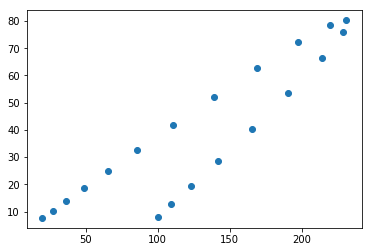

In [19]:
plp.scatter(y[0:-1],delta_pn)
plp.show()

In [20]:
y[0:-1]

array([ 19.56871355,  26.85451969,  36.44155312,  49.05588645,
        65.37349402,  85.85384127, 110.62653658, 139.00544236,
       169.10000199, 197.5628534 , 219.74671346, 231.06113224,
       228.83829673, 213.95900242, 190.8030109 , 165.17308626,
       141.80538549, 123.12354702, 109.44748339, 100.05160636])

In [21]:
A = np.column_stack((y[0:-1], np.ones(len(delta_pn))))

In [22]:
A

array([[ 19.56871355,   1.        ],
       [ 26.85451969,   1.        ],
       [ 36.44155312,   1.        ],
       [ 49.05588645,   1.        ],
       [ 65.37349402,   1.        ],
       [ 85.85384127,   1.        ],
       [110.62653658,   1.        ],
       [139.00544236,   1.        ],
       [169.10000199,   1.        ],
       [197.5628534 ,   1.        ],
       [219.74671346,   1.        ],
       [231.06113224,   1.        ],
       [228.83829673,   1.        ],
       [213.95900242,   1.        ],
       [190.8030109 ,   1.        ],
       [165.17308626,   1.        ],
       [141.80538549,   1.        ],
       [123.12354702,   1.        ],
       [109.44748339,   1.        ],
       [100.05160636,   1.        ]])

$$SCE=\sum\limits_{i=1}^{n}(\Delta_{p_n}-\hat{\Delta}_{p_n})^2$$
$$\hat{\Delta}_{p_n}=my+c$$

In [23]:
popt,res,rank,val= np.linalg.lstsq(A, delta_pn, rcond=None)

In [24]:
m,c=popt
print(m,c)

0.3345842025238874 -3.813163492490862


The value of $m$ corresponds to the estimation of $R$ and the value of $c$ is expected to be close to zero. The procedure has to be carry on several times.

In [25]:
k_est # 

927.4578511151558

The linear model is used for estimating $\Delta_{P_{(n)}}$

In [26]:
delta_pn_est=m*y[0:-1]
delta_pn_est

array([ 6.54738242,  8.98509805, 12.19276799, 16.41332465, 21.87293836,
       28.72533901, 37.01389152, 46.50902508, 56.57818931, 66.10140975,
       73.52377888, 77.30940467, 76.56567902, 71.5873022 , 63.83967324,
       55.26430534, 47.44584182, 41.19519379, 36.61939895, 33.47568693])

In [27]:
delta_pn

array([ 7.68066988, 10.31769317, 13.96940678, 18.8065068 , 24.96185379,
       32.66748069, 41.85840398, 52.19653946, 62.90754716, 72.35008051,
       78.71704382, 80.2734445 , 75.88869668, 66.28161988, 53.55545824,
       40.30512765, 28.56436158, 19.37889949, 12.6920083 ,  8.12951875])

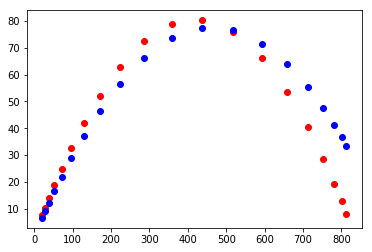

In [28]:
plp.plot(p_n[:-1],delta_pn,"ro")
plp.plot(p_n[:-1],delta_pn_est,"bo")

The values of the state variable are estimated using the values of $\hat{K}=K\_est$ and $\hat{R}=m$

In [29]:
pob_est=np.zeros(len(p_n))

In [30]:
pob_est[0]=p_n[0]
print(pob_est[0])

20.0


Modelo logístico en tiempo discreto
$$P_{(n)}=P_{(n-1)}\left(\hat{R}\left(1-\frac{P_{(n-1)}}{\hat{K}}\right)+1\right)$$
$$P_{(0)}=20$$

In [31]:
for i in range(1,len(p_n)):
    pob_est[i]=pob_est[i-1]+m*(1-pob_est[i-1]/k_est)*pob_est[i-1]

In [32]:
pob_est

array([ 20.        ,  26.54738242,  35.17547088,  46.49826177,
        61.27586342,  80.42326463, 104.99829665, 136.15188333,
       175.01873331, 222.52677749, 279.11684128, 344.39994363,
       416.84120624, 493.62628984, 570.88201532, 644.31810105,
       710.13121296, 765.80654473, 810.46560108, 844.67165138,
       869.89815813])

In [33]:
n=datos["tiempo"].values

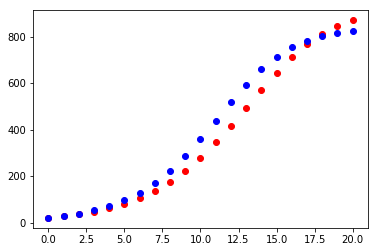

In [34]:
plp.plot(n,pob_est,"ro")
plp.plot(n,p_n,"bo")

In [35]:
print(k_est, m)

927.4578511151558 0.3345842025238874


Now, the values of $K$ and $R$ are estimated by minimizing the maximum absolute deviation

Máxima desviación absoluta
$$MDA=\max\limits_{i=1\cdots n}(|\Delta_{p_n}-\hat{\Delta}_{p_n}|)$$
$$\hat{\Delta}_{p_n}=my+c$$

In [36]:
#k_min_aux=k_min
k_max_aux=k_medio
print(k_min_aux,k_max_aux)

821.5023611206648 927.4578511151558


In [37]:
k_medio=(k_max_aux+k_min_aux)/2
print(k_medio)

874.4801061179103


In [38]:
k_est=834.74679#The best faound value is used this time
print(k_est)

834.74679


In [39]:
y=(1-p_n/k_est)*p_n

In [40]:
#xA=np.concatenate((x,-1*x),axis=0)
wA=np.ones(len(delta_pn)*2)*-1
yA=np.concatenate((y[0:-1]*-1,y[0:-1]),axis=0)
delta_pnA=np.concatenate((delta_pn*-1,delta_pn),axis=0)
cA=np.concatenate((np.ones(len(delta_pn))*-1,np.ones(len(delta_pn))),axis=0)
A2=np.column_stack((wA,yA,cA))
A2

array([[  -1.        ,  -19.52081277,   -1.        ],
       [  -1.        ,  -26.76276341,   -1.        ],
       [  -1.        ,  -36.26864619,   -1.        ],
       [  -1.        ,  -48.73247844,   -1.        ],
       [  -1.        ,  -64.77365669,   -1.        ],
       [  -1.        ,  -84.7562659 ,   -1.        ],
       [  -1.        , -108.65212774,   -1.        ],
       [  -1.        , -135.53393452,   -1.        ],
       [  -1.        , -163.17374018,   -1.        ],
       [  -1.        , -187.8109952 ,   -1.        ],
       [  -1.        , -204.42314947,   -1.        ],
       [  -1.        , -208.25150306,   -1.        ],
       [  -1.        , -196.86622721,   -1.        ],
       [  -1.        , -171.90579589,   -1.        ],
       [  -1.        , -138.81642582,   -1.        ],
       [  -1.        , -104.39178528,   -1.        ],
       [  -1.        ,  -73.95226877,   -1.        ],
       [  -1.        ,  -50.02303625,   -1.        ],
       [  -1.        ,  -32.

In [41]:
from scipy.optimize import linprog

In [42]:
w_bnds = (0, None)
m_bnds = (None, None)
c_bnds = (None, None)

res = linprog((1,0,0), A2, delta_pnA,bounds=(w_bnds,m_bnds,c_bnds))

In [43]:
res.x

array([0.07654834, 0.38463683, 0.09569798])

In [44]:
delta_pn_est2=y[0:-1]*res.x[1]

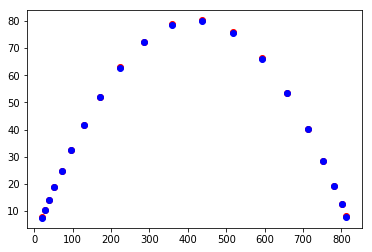

In [45]:
plp.plot(p_n[:-1],delta_pn,"ro")
plp.plot(p_n[:-1],delta_pn_est2,"bo")

In [46]:
np.sum((delta_pn-delta_pn_est2)*(delta_pn-delta_pn_est2))

0.2863318652714916

In [47]:
pob_est2=np.zeros(len(p_n))
pob_est2[0]=p_n[0]
for i in range(1,len(p_n)):
    pob_est2[i]=pob_est2[i-1]+res.x[1]*(1-pob_est2[i-1]/k_est)*pob_est2[i-1]

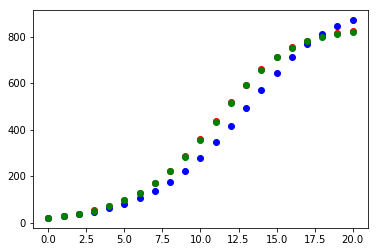

In [48]:
plp.plot(n,p_n,"ro")
plp.plot(n,pob_est,"bo")
plp.plot(n,pob_est2,"go")

Sum of squares of deviations or errors / Sumatoria de cuadrados de las desviaciones o de los errores
$$\sum\limits_{n=1}^N(P_n-\hat{P}_n)^2$$

In [49]:
np.sum((p_n-pob_est2)*(p_n-pob_est2))

65.44729698370708

In [50]:
np.sum((p_n-pob_est)*(p_n-pob_est))

60546.068411175234

Maximum deviations or absolute errors / Máxima de las desviaciones o de los errores absolutos 
$$\max\limits_{n=1\cdots N}|P_n-\hat{P}_n|$$

In [51]:
np.max(np.abs(p_n-pob_est2))

3.050701718315395

In [52]:
np.max(np.abs(p_n-pob_est))

99.8654643175808

In [53]:
k_est # Valor del parametro K, capacidad máxima del sistema

834.74679

In [54]:
res.x[1] # Valor del parametyro R, la tasa intrínseca de crecimiento

0.38463683095741724

### Fixed points logistic equation 
Rewriting the afore mentioned equation as a recurrence relation or difference equation
$x_{(n)}=x_{(n-1)}\left(R\left(1-\frac{x_{(n-1)}}{K}\right)+1\right)$

thus

$f(x)=x\left(R\left(1-\frac{x}{K}\right)+1\right)$

to find the fixed points $\bar{x}$, we look at

$\bar{x}=\bar{x}\left(R\left(1-\frac{\bar{x}}{K}\right)+1\right)$
This has to solution, namely $\bar{x}=0$ and $\bar{x}=K$

### Stability of nonlinear first-order recurrences
Consider the nonlinear first-order recurrence

$x_{(n)}=f(x_{(n-1)}$

This recurrence is locally stable, meaning that it converges to a
fixed point $x^*$ from points sufficiently close to $x^*$, if and
only if the slope of $f$ in the neighborhood of $x^*$ is smaller
than unity in absolute value: that is,

$|f'(x^*)|<1$

Note that a nonlinear recurrence could have multiple fixed points,
in which case some fixed points may be locally stable and others
locally unstable; for continuous $f$ two adjacent fixed points
cannot both be locally stable. 

###  Stability of fixed points logistic equation
Computing the derivative of $f(x)$ we obtain
$f'(x)=R-\frac{2Rx}{K}+1$

$\bar{x}=0$ is stable if

$|R+1|<1\ or \ -2<R<0$

$\bar{x}=K$ is stable if

$|1-R|<1\ or\ 0<R<2$
 }